Предыстория вопроса состоит в том, что в работе 

https://nbviewer.org/github/daju1/articles/blob/master/electrostatic_vector_potential/Vector_potential_of_the_electrostatic_field_of_a_point_charge.ipynb

мне удалось записать векторный потенциал для кулоновского поля точечного электрического заряда. Таким образом формула для векторного потенциала кулоновского заряда получена и проверка показала, что операция ротора примененная к этому векторнному потенциалу дает кулоновское электрическое поле точечного заряда.

Полученный векторный потенциал по своей форме весьма интересный. Его вид как будто показал, что существование электростатического заряда не возможно без выделенной оси вращения.

Поэтому в настоящей работе я задаюсь следующим вопросом: может ли векторный потенциал кулоновского поля электрона создаваться, например, с помощью прецессии дипольного момента магнетона Бора?

Таким образом я рассматриваю далее следующую задачу: имеется магнитный диполь с двумя противоположно заряженными магнитными полюсами, который прецессирует вокруг оси проходящей через центр магнитного диполя. Таким образом создаётся симметричная пара кольцевых магнитных токов, которые текут во взаимно противоположных направлениях (потому как движение по окружности в одном и том же направлении, например по часовой стрелке, пары магнитных зарядов, имеющих противоположные знаки создает пару взаимно противоположных по направлению кольцевых магнитных токов).

Для решения этой задачи в литературе был найден алгоритм расчета векторного потенциала для кольцевого тока, который сводится к эллиптическим интегралам. Таким образом трехмерное интегрирование сводится к двумерному.

И теперь я записываю интегральное уравнение, которое выглядит следующим образом: в левой части формула векторного потенциала кулоновского заряда, а в правой части двойной интеграл по пространственным координатам (в цилиндрической системе координат) источников магнитного тока по объему.

Поскольку я рассматриваю не точечный магнитный заряд в составе прецессирующего диполя магнетона Бора, а распределенный в пространстве магнитный заряд, то в подынтегральном выражении моего интегрального уравнения есть два множителя: неизвестная функция плотности распределения магнитных токов в пространстве и так называемое ядро (или оператор) моего интегрального уравнения.

Интегральное уравнение решается методом итераций. Из-за вычислительных сложностей многоитерационного интегирования в данной работе представлен результат лишь нулевого приближения неизвестной функции распределения магнитных токов прецессирующего магнетона Бора в пространстве.

# Векторный потенциал кольцевого тока

Вслед за

SCIENCE TIME.
ПОТЕНЦИАЛЫ – ИСТОЧНИКИ
ЭЛЕКТРИЧЕСКИХ, МАГНИТНЫХ И
ЭЛЕКТРОМАГНИТНЫХ ПОЛЕЙ.
Черкашин Юрий Семёнович

Выберем ортогональную цилиндрическую систему координат. Вектор тока в этой системе
имеет только одну альфовую проекцию. Такую же составляющую должен иметь
и вектор А

$d\vec{A} = \frac{\mu}{4 \pi}\int\limits_{\varphi}^{}\frac{d\vec{I}}{R}$

Элемент интегрирования

$d\vec{l} = r d \varphi \,{\vec {e}}_{\varphi }$

Его проекции на направления ${\vec {e}}_{r}$  и на ${\vec {e}}_{\varphi }$: 

$dl_r = r \, d \varphi \,sin\,{\varphi }$

$dl_{\varphi} = r \, d \varphi \,cos\,{\varphi }$

радиус-вектор интегрирования

$R=\sqrt{r_j^2+r_a^2-2\,r_j\,r_a\,cos(\varphi_j)+(z_j-z_a)^2}$

Выразим подкоренное выражение в относительных единицах - вынесем $r_j$ за знак радикала.

$R=r_j\sqrt{1+\frac{r_a^2}{r_j^2}-2\,\frac{r_a}{r_j}\,cos(\varphi_j)+\frac{(z_j-z_a)^2}{r_j^2}}$

$\vec{A} = \frac{\mu \, I}{4 \pi}\int\limits_{\varphi}^{}\frac{r_j \, d \varphi \,{\vec {e}}_{\varphi }}{R}$

$dl_{\varphi} = r_j \, d \varphi \,cos\,{\varphi }$

$A_{\varphi} = \frac{\mu \, I}{4 \pi}\int\limits_{\varphi}^{}\frac{r_j \,cos\,{\varphi } \, d \varphi}{R}$

$A_{\varphi} = \frac{\mu \, I}{4 \pi}\int\limits_{\varphi_j}^{}\frac{cos\,{\varphi_j } \, d \varphi_j}{\sqrt{1+\frac{r_a^2}{r_j^2}+\frac{(z_j-z_a)^2}{r_j^2}-2\,\frac{r_a}{r_j}\,cos(\varphi_j) }}$

$A_{\varphi} = \frac{\mu \, I}{4 \pi}\int\limits_{\varphi_j}^{}\frac{cos\,{\varphi_j } \, d \varphi_j}{\sqrt{a-b\,cos(\varphi_j) }}$,

где $a = 1+\frac{r_a^2}{r_j^2}+\frac{(z_j-z_a)^2}{r_j^2}$, $b = 2\,\frac{r_a}{r_j}$

преобразуем этот интеграл:
    
$A_{\varphi} = \frac{\mu \, I}{4 \pi}\int\limits_{\varphi_j}^{}\frac{cos\,{\varphi_j} \, d \varphi_j}{\sqrt{a-b\,cos(\varphi_j) }}$

$A_{\varphi} = -\frac{\mu \, I}{4 \pi b}\int\limits_{\varphi_j}^{}\frac{-\,b\,cos\,{\varphi_j} \, d \varphi_j}{\sqrt{a-b\,cos(\varphi_j) }}$

$A_{\varphi} = -\frac{\mu \, I}{4 \pi b}\int\limits_{\varphi_j}^{}\frac{a \,-\,b\,cos\,{\varphi_j} \,-\, a }{\sqrt{a-b\,cos(\varphi_j) }}\, d \varphi_j$

$$A_{\varphi} = -\frac{\mu \, I}{4 \pi b}\int\limits_{\varphi_j}^{}\frac{a \,-\,b\,cos\,{\varphi_j} }{\sqrt{a-b\,cos(\varphi_j) }}\, d \varphi_j + \frac{\mu \, I}{4 \pi b}\int\limits_{\varphi}^{}\frac{a}{\sqrt{a-b\,cos(\varphi_j) }}\, d \varphi_j$$

$$A_{\varphi} = \frac{\mu \, I}{4 \pi b}\int\limits_{\varphi_j}^{}\frac{a}{\sqrt{a-b\,cos(\varphi_j) }}\, d \varphi_j -\frac{\mu \, I}{4 \pi b}\int\limits_{\varphi_j}^{}{\sqrt{a-b\,cos(\varphi_j) }}\, d \varphi_j$$

Он свёлся к двум интегралам, напоминающим об эллиптической форме.

Далее воспользуемся тригонометрической формулой косинус двойного угла:

$cos 2 \alpha = cos^{~2} \alpha - sin^{~2} \alpha$

$cos(\varphi_j) = cos^{~2} \left(\frac{\varphi_j}{2}\right) - sin^{~2} \left(\frac{\varphi_j}{2}\right)$

$cos(\varphi_j) = 1 - 2\,sin^{~2} \left(\frac{\varphi_j}{2}\right)$

$$A_{\varphi} = \frac{\mu \, I}{4 \pi b}\int\limits_{\varphi_j}^{}\frac{a}{\sqrt{a\,-\,b\,\left(1 - 2\,sin^{~2} \left(\frac{\varphi_j}{2}\right) \right) }}\, d \varphi_j -\frac{\mu \, I}{4 \pi b}\int\limits_{\varphi_j}^{}{\sqrt{a-b\,\left(1 - 2\,sin^{~2} \left(\frac{\varphi_j}{2}\right) \right) }}\, d \varphi_j$$

$$A_{\varphi} = \frac{\mu \, I}{4 \pi b}\int\limits_{\varphi_j}^{}\frac{a}{\sqrt{a\,-\,b\,+\,2\,b\,sin^{~2} \left(\frac{\varphi_j}{2}\right) }}\, d \varphi_j -\frac{\mu \, I}{4 \pi b}\int\limits_{\varphi_j}^{}{\sqrt{a-b + 2\,b\,sin^{~2} \left(\frac{\varphi_j}{2}\right) }}\, d \varphi_j$$

Это эллиптические интегралы, однако, перед $sin^2x$ стоит знак плюс. Сделаем замену переменных:

$\frac{\varphi_j}{2} = \psi \pm \frac{\pi}{2}$

$\psi = \frac{\varphi_j}{2} \pm \frac{\pi}{2}$

$d\varphi_j = 2 \, d \psi$

$sin^{~2} \left(\frac{\varphi_j}{2}\right) = 1-cos^{~2} \left(\frac{\varphi_j}{2}\right) = 1-sin^{~2} \psi$

Пределы 

$\varphi_j = 0$, $\psi = \frac{\pi}{2}$

$\varphi_j = 2 \pi$, $\frac{\varphi_j}{2} = \pi$, $\psi = -\frac{\pi}{2}$

$\left\{cos \,\alpha = sin \left(\frac{\pi}{2} \pm \alpha \right)\right\}$

$A_{\varphi} = \frac{2\,\mu \, I}{4 \pi b}\int\limits_{\psi}^{}\frac{a}{\sqrt{a\,-\,b\,+\,2\,b\,\left(1-sin^{~2} \psi\right) }}\, d \psi -\frac{2\,\mu \, I}{4 \pi b}\int\limits_{\psi}^{}{\sqrt{a-b + 2\,b\,\left(1-sin^{~2} \psi\right) }}\, d \psi$

$A_{\varphi} = \frac{2\,\mu \, I}{4 \pi b}\int\limits_{\psi}^{}\frac{a}{\sqrt{a\,+\,b\,-\,2\,b\,sin^{~2} \psi }}\, d \psi -\frac{2\,\mu \, I}{4 \pi b}\int\limits_{\psi}^{}{\sqrt{a\,+\,b\,-\,2\,b\,sin^{~2} \psi }}\, d \psi$

вынесем из под корня $\left(a\,+\,b\right)$, 

$A_{\varphi} = \frac{2\,\mu \, I}{4 \pi b}\frac{1}{\sqrt{a+b}}\int\limits_{\psi}^{}\frac{a}{\sqrt{1\,-\,\frac{2\,b}{a+b}\,sin^{~2} \psi }}\, d \psi -\frac{2\,\mu \, I}{4 \pi b}\sqrt{a+b}\int\limits_{\psi}^{}{\sqrt{1\,-\,\frac{2\,b}{a+b}\,sin^{~2} \psi }}\, d \psi$

обозначив $m=\frac{2\,b}{a\,+\,b}$ получим: 

$A_{\varphi} = \frac{\mu \, I}{4 \pi} \left(\frac{a}{b}\frac{2}{\sqrt{a+b}}\int\limits_{\psi}^{}\frac{d \psi}{\sqrt{1\,-\,m\,sin^{~2} \psi }} - \frac{2\sqrt{a+b}}{b}\int\limits_{\psi}^{}{\sqrt{1\,-\,m\,sin^{~2} \psi }}\, d \psi \right)$

Имеем два стандартных эллиптических интеграла.


Окончательно имеем

$A_{\varphi} = \frac{\mu \, I}{4 \pi} \left(\frac{a}{b}\frac{2}{\sqrt{a+b}}\int\limits_{0}^{\pi/2}\frac{d \psi}{\sqrt{1\,-\,m\,sin^{~2} \psi }} - \frac{2\sqrt{a+b}}{b}\int\limits_{0}^{\pi/2}{\sqrt{1\,-\,m\,sin^{~2} \psi }}\, d \psi \right)$

$A_{\varphi} = \frac{\mu \, I}{4 \pi} \left(k_K\int\limits_{0}^{\pi/2}\frac{d \psi}{\sqrt{1\,-\,m\,sin^{~2} \psi }} - k_E\int\limits_{0}^{\pi/2}{\sqrt{1\,-\,m\,sin^{~2} \psi }}\, d \psi \right)$

$k_K = \frac{a}{b}\frac{2}{\sqrt{a+b}}$

$k_E = \frac{2\sqrt{a+b}}{b}$

$A_{\varphi} = \frac{\mu \, I}{4 \pi} \left(k_K\,K(m) - k_E\,E(m) \right)$

где при принятых обозначениях

$K = \int\limits_{0}^{\pi/2}\frac{d \psi}{\sqrt{1\,-\,k^2\,sin^{~2} \psi }}$

$E = \int\limits_{0}^{\pi/2}{\sqrt{1\,-\,k^2\,sin^{~2} \psi }}\, d \psi$

есть полные эллиптические интегралы первого и второго рода

Полный нормальный эллиптический интеграл Лежандра 1-го рода

Complete elliptic integral of the first kind

class sage.functions.special.EllipticKC

Return the complete elliptic integral of the first kind:

$K(m) = \int\limits_{0}^{\pi/2}\frac{d \psi}{\sqrt{1\,-\,m\,sin^{~2} \psi }}$

sage: elliptic_kc(m)     

Полный нормальный эллиптический интеграл Лежандра 2-го рода

Complete elliptic integral of the second kind

class sage.functions.special.EllipticEC

$E(m) = \int\limits_{0}^{\pi/2}{\sqrt{1\,-\,m\,sin^{~2} \psi }}\, d \psi$

sage: elliptic_ec(m)

In [1]:
from IPython.display import display, Math, Latex

def disp(ex):
    display(Math(latex(ex)))
    
def displ(tex):
    display(Math(tex))

In [2]:
z_j = var("z_j")
z_a = var("z_a")
r_j = var("r_j")
r_a = var("r_a")

assume(r_j>0)
assume(r_a>0)

$a = 1+\frac{r_a^2}{r_j^2}+\frac{(z_j-z_a)^2}{r_j^2}$, $b = 2\,\frac{r_a}{r_j}$

In [3]:
# a and b for ring
a = lambda rj, ra, zj, za : 1 + (ra/rj)^2 + ((zj-za)/rj)^2
b = lambda rj, ra : 2 * (ra/rj)

$m = \frac{2\,b}{a\,+\,b}$

In [4]:
# m for ring
m = lambda rj, ra, zj, za : 2 * b (rj, ra) / (a(rj, ra, zj, za) + b(rj, ra))

$k_K = \frac{a}{b}\frac{2}{\sqrt{a+b}}$

$k_E = \frac{2\sqrt{a+b}}{b}$

In [5]:
# k_K and k_E for ring
k_K = lambda rj, ra, zj, za : 2 * a(rj, ra, zj, za) / b(rj, ra) / sqrt(a(rj, ra, zj, za) + b(rj, ra))
k_E = lambda rj, ra, zj, za : 2 * sqrt(a(rj, ra, zj, za) + b(rj, ra)) / b(rj, ra)

$A_{\varphi} = \frac{\mu \, I}{4 \pi} \left(k_K\,K - k_E\,E \right)$

In [6]:
A_ring = lambda rj, ra, zj, za : \
       + k_K(rj, ra, zj, za) * elliptic_kc(m(rj, ra, zj, za)) \
       - k_E(rj, ra, zj, za) * elliptic_ec(m(rj, ra, zj, za))

Векторный потенциал токового кольца на высоте z=0.2r

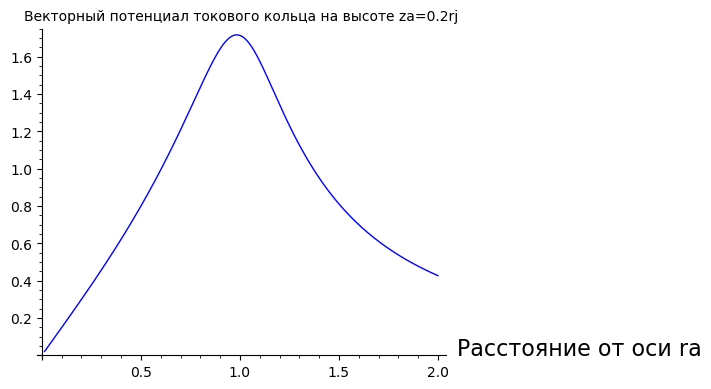

In [7]:
p = plot(A_ring(rj = 1, ra = r_a, zj = 0, za = 0.2), (r_a, 0, 2))
p.show(title="Векторный потенциал токового кольца на высоте za=0.2rj",
       axes_labels=["Расстояние от оси ra", ""])

Измерительный контур равного с кольцом диаметра приподнятый на z/r

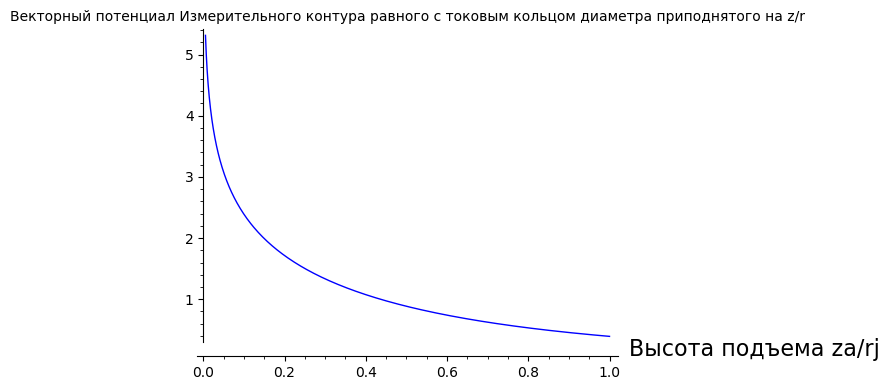

In [8]:
p = plot(A_ring(rj = 1, ra = 1, zj = 0, za = z_a), (z_a, 0, 1))
p.show(title="Векторный потенциал Измерительного контура равного с токовым кольцом диаметра приподнятого на z/r",
       axes_labels=["Высота подъема za", ""])

# Векторный потенциал электростатического поля точечного заряда

$$\vec A = -\frac{ z}{{\rho}\sqrt{\rho^{2} + z^{2}} }\,{\vec {e}}_{\varphi }$$

In [9]:
A_q = lambda ra, za : za /(ra * sqrt(ra^2 + za^2))

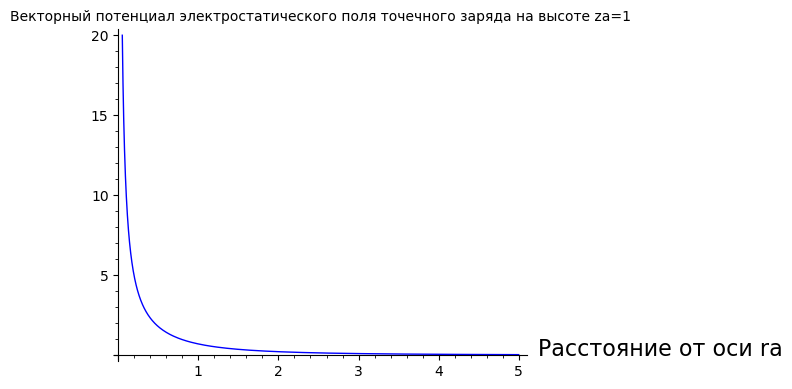

In [10]:
p = plot(A_q(ra = r_a, za = 1), (r_a, 0.05, 5))
p.show(title="Векторный потенциал электростатического поля точечного заряда на высоте za=1",
       axes_labels=["Расстояние от оси ra", ""])

Измерительный контур заданного диаметра приподнятый на высоту z

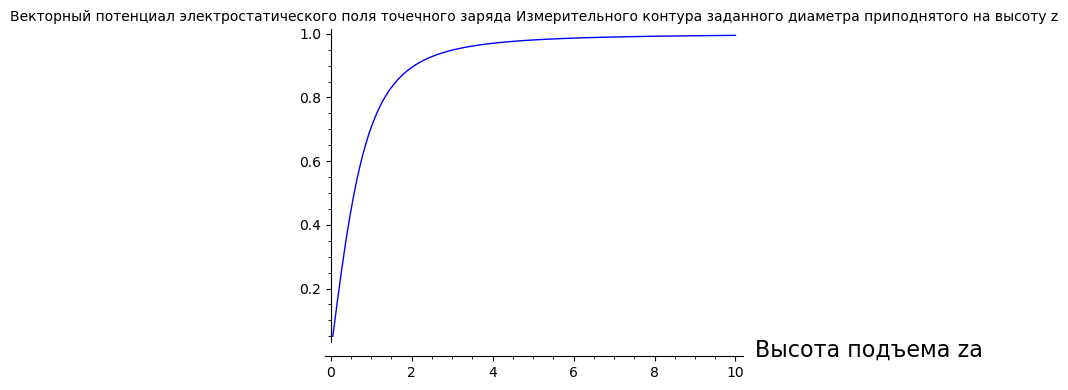

In [11]:
p = plot(A_q(ra = 1, za = z_a), (z_a, 0.05, 10))
p.show(title="Векторный потенциал электростатического поля точечного заряда Измерительного контура заданного диаметра приподнятого на высоту z",
       axes_labels=["Высота подъема za", ""])

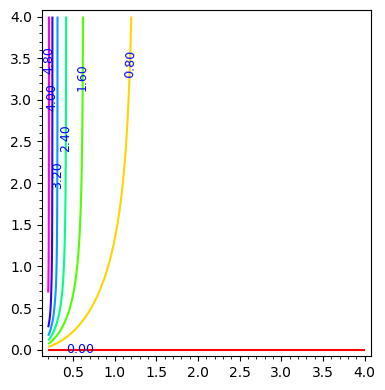

In [12]:
contour_plot(A_q(ra=r_a, za=z_a), (r_a,0.2,4), (z_a,0,4), fill=False, cmap='hsv', labels=True)

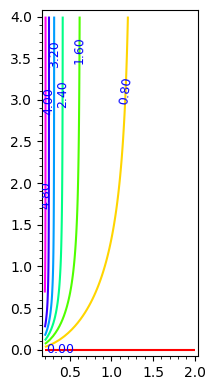

In [13]:
contour_plot(A_q(ra=r_a, za=z_a), (r_a,0.2,2), (z_a,0,4), fill=False, cmap='hsv', labels=True)

# Векторный потенциал прецессирующего магнитного диполя

In [14]:
A_dipol = lambda rj, ra, zj, za : \
        + A_ring(rj, ra, +zj, za) \
        - A_ring(rj, ra, -zj, za)

Векторный потенциал прецессирующего магнитного диполя на высоте za в зависимости от Расстояние от оси ra

In [15]:
plot_data_A_dipol_r = []
for ir in range(1,200):
    # Расстояние от оси R/r (лин шкала)
    ra = 0.1 * ir
    d = .1
    A_phi_dipol = A_dipol(rj = 1*d, ra = ra, zj = d, za = 1)
    plot_data_A_dipol_r += [(ra, A_phi_dipol)]

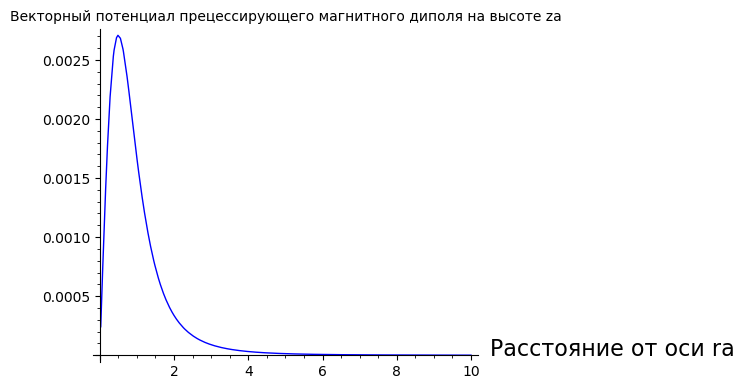

In [16]:
p = plot(A_dipol(rj = 1*d, ra = r_a, zj = d, za = 1), (r_a, 0, 10))
p.show(title="Векторный потенциал прецессирующего магнитного диполя на высоте za",
       axes_labels=["Расстояние от оси ra", ""])

Измерительный контур равного с кольцом диаметра приподнятый на z/r

In [ ]:
plot_data_A_dipol_z = []
for iz in range(1,100):
    za = 0.1 * iz
    d=1
    if (za != 1):
        A_phi_dipol = A_dipol(rj = 1*d, ra = 2, zj = 1*d, za = za)
        #print(za, A_phi_dipol)
        plot_data_A_dipol_z += [(za, A_phi_dipol)]

In [ ]:
p = list_plot(plot_data_A_dipol_z)

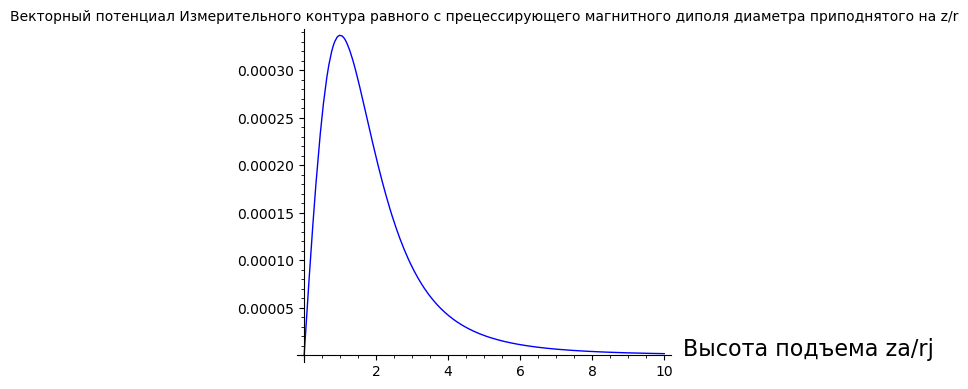

In [17]:
p = plot(A_dipol(rj = 1*d, ra = 2, zj = 1*d, za = z_a), (z_a, 0, 10))
p.show(title="Векторный потенциал Измерительного контура равного с прецессирующего магнитного диполя диаметра приподнятого на z/r",
       axes_labels=["Высота подъема za", ""])

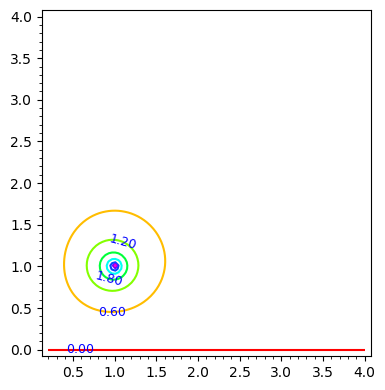

In [18]:
contour_plot(A_dipol(rj = 1, ra=r_a, zj = 1, za=z_a), (r_a,0.2,4), (z_a,0,4), fill=False, cmap='hsv', labels=True)

# Интегральное уравнение для векторного потенциала кулоновского заряда 

в цилиндрической системе координат

$\rho_a$, $z_a$ - координаты наблюдения

$\rho_m$, $z_m$, $\varphi_m$ - координаты интегрирования, координаты магнитных зарядов

$-\frac{z_a}{{\rho_a}\sqrt{\rho_a^{2} + z_a^{2}} } = \int\limits_{z_m=-\infty}^{\infty}\,\,\int\limits_{\rho_m=0}^{\infty}\frac{q_m(\rho_m, z_m)\, \omega_m (\rho_m, z_m)}{c} \rho_m^2 \left(\int\limits_{\varphi_m=0}^{2\pi}\frac{cos\,{\varphi_m } \, d \varphi_m}{\sqrt{\rho_m^2+\rho_a^2-2\,\rho_m\,\rho_a\,cos(\varphi_m)+(z_m-z_a)^2}}\right)d \rho_m \, d z_m$

$-\frac{z_a}{{\rho_a}\sqrt{\rho_a^{2} + z_a^{2}} } = \int\limits_{z_m=-\infty}^{\infty}\,\,\int\limits_{\rho_m=0}^{\infty}\frac{j_m(\rho_m, z_m) \,\rho_m}{c} \left(\int\limits_{\varphi_m=0}^{2\pi}\frac{cos\,{\varphi_m } \, d \varphi_m}{\sqrt{\rho_m^2+\rho_a^2-2\,\rho_m\,\rho_a\,cos(\varphi_m)+(z_m-z_a)^2}}\right)d \rho_m \, d z_m$

$-\frac{z_a}{{\rho_a}\sqrt{\rho_a^{2} + z_a^{2}} } = \int\limits_{z_m=-\infty}^{\infty}\,\,\int\limits_{\rho_m=0}^{\infty}\frac{j_m(\rho_m, z_m) \,\rho_m}{c} \left(\int\limits_{\varphi_m=0}^{2\pi}\frac{cos\,{\varphi_m } \, d \varphi_m}{R}\right)d \rho_m \, d z_m$

$-\frac{z_a}{{\rho_a}\sqrt{\rho_a^{2} + z_a^{2}} } = \int\limits_{z_m=-\infty}^{\infty}\,\,\int\limits_{\rho_m=0}^{\infty}\frac{q_m(\rho_m, z_m)\, \omega_m (\rho_m, z_m)}{c} \rho_m \left(\int\limits_{\varphi_m=0}^{2\pi}\frac{cos\,{\varphi_m } \, d \varphi_m}{\sqrt{1+\frac{\rho_a^2}{\rho_m^2}+\frac{(z_m-z_a)^2}{\rho_m^2}-2\,\frac{\rho_a}{\rho_m}\,cos(\varphi_m) }}\right)d \rho_m \, d z_m$

$-\frac{z_a}{{\rho_a}\sqrt{\rho_a^{2} + z_a^{2}} } = \int\limits_{z_m=-\infty}^{\infty}\,\,\int\limits_{\rho_m=0}^{\infty}\frac{j_m(\rho_m, z_m)}{c} \left(\int\limits_{\varphi_m=0}^{2\pi}\frac{cos\,{\varphi_m } \, d \varphi_m}{\sqrt{1+\frac{\rho_a^2}{\rho_m^2}+\frac{(z_m-z_a)^2}{\rho_m^2}-2\,\frac{\rho_a}{\rho_m}\,cos(\varphi_m) }}\right)d \rho_m \, d z_m$

Неизвестные функции

$q_m(\rho_m, z_m)$ - плотность магнитного заряда в зависимости от цилиндрических координат

$\omega_m (\rho_m, z_m)$ - круговая частота вращения

$j_m(\rho_m, z_m) = q_m(\rho_m, z_m)\, \omega_m (\rho_m, z_m) \, \rho_m$ - плотность магнитного тока

Произведя аналогичные преобразования к эллиптическим интегралам (аналогичные рассмотренным в перврй части данной работы) получим следующий вид интегрального уравнения

$-\frac{z_a}{{\rho_a}\sqrt{\rho_a^{2} + z_a^{2}} } = \int\limits_{z_m=-\infty}^{\infty}\,\,\int\limits_{r_m=0}^{\infty}\frac{q_m(\rho_m, z_m)\, \omega_m (\rho_m, z_m)}{c} \rho_m \left(\frac{a}{b}\frac{2}{\sqrt{a+b}}\int\limits_{0}^{\pi/2}\frac{d \psi}{\sqrt{1\,-\,m\,sin^{~2} \psi }} - \frac{2\sqrt{a+b}}{b}\int\limits_{0}^{\pi/2}{\sqrt{1\,-\,m\,sin^{~2} \psi }}\, d \psi\right)d \rho_m \, d z_m$

где $a = 1+\frac{\rho_a^2}{\rho_j^2}+\frac{(z_j-z_a)^2}{\rho_j^2}$, $b = 2\,\frac{\rho_a}{\rho_j}$

принимая тот же вид для

$m=\frac{2\,b}{a\,+\,b}$

$k_K = \frac{a}{b}\frac{2}{\sqrt{a+b}}$

$k_E = \frac{2\sqrt{a+b}}{b}$

Перепишем теперь интегральное уравнение в виде

$-\frac{z_a}{{\rho_a}\sqrt{\rho_a^{2} + z_a^{2}} } = \int\limits_{z_m=-\infty}^{\infty}\,\,\int\limits_{r_m=0}^{\infty}\frac{q_m(\rho_m, z_m)\, \omega_m (\rho_m, z_m)}{c} r_m \left(k_K\,K(m) - k_E\,E(m)\right)d \rho_m \, d z_m$

In [19]:
z_m = var("z_m")
z_a = var("z_a")
r_m = var("r_m")
r_a = var("r_a")

assume(r_m>0)
assume(r_a>0)

In [20]:
disp(a(r_m, r_a, z_m, z_a))

<IPython.core.display.Math object>

In [21]:
disp(b(r_m, r_a))

<IPython.core.display.Math object>

$m = \frac{2\,b}{a\,+\,b}$

In [22]:
disp(m(r_m, r_a, z_m, z_a))

<IPython.core.display.Math object>

$k_K = \frac{a}{b}\frac{2}{\sqrt{a+b}}$

$k_E = \frac{2\sqrt{a+b}}{b}$

In [23]:
disp(k_K(r_m, r_a, z_m, z_a))

<IPython.core.display.Math object>

In [24]:
disp(k_E(r_m, r_a, z_m, z_a))

<IPython.core.display.Math object>

ядро интегрального уравнения (в круглых скобках)

In [25]:
Kern = lambda rm, ra, zm, za : \
      + k_K(rm, ra, zm, za) * elliptic_kc(m(rm, ra, zm, za)) \
      - k_E(rm, ra, zm, za) * elliptic_ec(m(rm, ra, zm, za))

In [26]:
disp(Kern(r_m, r_a, z_m, z_a))

<IPython.core.display.Math object>

ядро интегрального уравнения (с учётом также и множителя $r_m$) - в дипольной форме (учитывая симметричность распределения магнитных зарядов относительно плоскости $z = 0$)

$-\frac{z_a}{{r_a}\sqrt{r_a^{2} + z_a^{2}} } = \int\limits_{z_m=0}^{\infty}\,\,\int\limits_{r_m=0}^{\infty}\frac{q_m(r_m, z_m)\, \omega_m (r_m, z_m) \, r_m}{c} Kern\_dipol(r_m, r_a, z_m, z_a) \,\, d r_m \, d z_m$

In [27]:
Kern_dipol = lambda rm, ra, zm, za : \
           + Kern(rm, ra, +zm, za) \
           - Kern(rm, ra, -zm, za)

In [28]:
disp(Kern_dipol(r_m, r_a, z_m, z_a))

<IPython.core.display.Math object>

Теперь интегральное уравнение в дипольной форме выглядит так

In [29]:
j_m = function("j_m")(r_m, z_m)

In [30]:
displ("-\\frac{z_a}{{r_a}\\sqrt{r_a^{2} + z_a^{2}} } = " +
      " \\int\\limits_{z_m=0}^{\\infty}\\,\\int\\limits_{r_m=0}^{\\infty}\\frac{q_m(r_m, z_m)\\," +
      " \\omega_m (r_m, z_m) \\, r_m}{c}" +
      " \\cdot \\left(" + 
      latex(Kern_dipol(r_m, r_a, z_m, z_a)) +
      "\\right)  \\, d r_m \\, d z_m")

<IPython.core.display.Math object>

In [31]:
from sage.symbolic.integration.integral import definite_integral

eq1 = - A_q(r_a, z_a) == \
    definite_integral( \
        definite_integral( \
            j_m(r_m=r_m, z_m=z_m) * Kern_dipol(r_m, r_a, z_m, z_a), \
                r_m, 0, Infinity, hold=True), \
                    z_m, 0, Infinity, hold=True)
disp(eq1)

<IPython.core.display.Math object>

Это линейное интегральное уравнение Фредгольма первого рода.

Разделим интеграл в правой части на сумму двух интегралов по переменной интегрирования $z_m$

In [64]:
eq1 = - A_q(r_a, z_a) == \
    definite_integral( \
        definite_integral( \
            j_m(r_m=r_m, z_m=z_m) * Kern_dipol(r_m, r_a, z_m, z_a), \
                r_m, 0, Infinity, hold=True), \
                    z_m, 0, z_a, hold=True) + \
    definite_integral( \
        definite_integral( \
            j_m(r_m=r_m, z_m=z_m) * Kern_dipol(r_m, r_a, z_m, z_a), \
                r_m, 0, Infinity, hold=True), \
                    z_m, z_a, Infinity, hold=True)

Продифференцируем теперь обе части интегрального уравнения по $z_a$

In [34]:
def definite_integral_derivative(f, x, a, b, diff_param, hold=True):
    from sage.symbolic.integration.integral import definite_integral

    if not x.has(diff_param):
        # integration variable != differentiation variable
        ans = definite_integral(diff(f, diff_param), x, a, b, hold=hold)
    else:
        ans = SR.zero()

    if hasattr(b, 'diff'):
        if b.diff(diff_param) != 0:
            ans += subs(f, x == b) * b.diff(diff_param)
    if hasattr(a, 'diff'):
        if a.diff(diff_param) != 0:
            ans -= subs(f, x == a) * a.diff(diff_param)

    return ans

In [41]:
eq1 = - A_q(r_a, z_a).diff(z_a) == \
    + definite_integral( \
        definite_integral( \
            (j_m(r_m=r_m, z_m=z_m) * Kern_dipol(r_m, r_a, z_m, z_a)).diff(z_a), \
                r_m, 0, Infinity, hold=True), \
                    z_m, 0, z_a, hold=True) \
    + definite_integral( #            assume(z_m < z_a) \ 
        (j_m(r_m=r_m, z_m=z_m) * Kern_dipol(r_m, r_a, z_m, z_a)).subs(z_m == z_a),  \
            r_m, 0, Infinity, hold=True) \
    + definite_integral( \
        definite_integral( \
            (j_m(r_m=r_m, z_m=z_m) * Kern_dipol(r_m, r_a, z_m, z_a)).diff(z_a), \
                r_m, 0, Infinity, hold=True), \
                    z_m, z_a, Infinity, hold=True) \
    - definite_integral( #            assume(z_m > z_a) \
        (j_m(r_m=r_m, z_m=z_m) * Kern_dipol(r_m, r_a, z_m, z_a)).subs(z_m == z_a), \
            r_m, 0, Infinity, hold=True)

In [36]:
eq1 = - A_q(r_a, z_a).diff(z_a) == \
    definite_integral( \
        definite_integral( \
            (j_m(r_m=r_m, z_m=z_m) * Kern_dipol(r_m, r_a, z_m, z_a)).diff(z_a), \
                r_m, 0, Infinity, hold=True), \
                    z_m, 0, z_a, hold=True) \
    + definite_integral( \
        (j_m(r_m=r_m, z_m=z_m) * Kern_dipol(r_m, r_a, z_m, z_a)).subs(z_m == z_a), \
            r_m, 0, Infinity, hold=True) \
    + definite_integral( \
        definite_integral( \
            (j_m(r_m=r_m, z_m=z_m) * Kern_dipol(r_m, r_a, z_m, z_a)).diff(z_a), \
                r_m, 0, Infinity, hold=True), \
                    z_m, z_a, Infinity, hold=True) \
    - definite_integral( \
        (j_m(r_m=r_m, z_m=z_m) * Kern_dipol(r_m, r_a, z_m, z_a)).subs(z_m == z_a), \
            r_m, 0, Infinity, hold=True)

In [36]:
eq1 = - A_q(r_a, z_a).diff(z_a) == \
    + definite_integral( \
        definite_integral( \
            (j_m(r_m=r_m, z_m=z_m) * Kern_dipol(r_m, r_a, z_m, z_a)).diff(z_a), \
                r_m, 0, Infinity, hold=True), \
                    z_m, 0, Infinity, hold=True) \
    + definite_integral( #            assume(z_m < z_a) \
        (j_m(r_m=r_m, z_m=z_m) * Kern_dipol(r_m, r_a, z_m, z_a)).subs(z_m == z_a), \
            r_m, 0, Infinity, hold=True) \
    - definite_integral( #            assume(z_m > z_a) \
        (j_m(r_m=r_m, z_m=z_m) * Kern_dipol(r_m, r_a, z_m, z_a)).subs(z_m == z_a), \
            r_m, 0, Infinity, hold=True)

In [63]:
disp(Kern_dipol(r_m, r_a, z_m, z_a).subs(r_m == r_a).subs(z_m == z_a))

<IPython.core.display.Math object>

In [70]:
disp(Kern(r_m, r_a, z_m, z_a).diff(r_a))

<IPython.core.display.Math object>

In [71]:
disp(Kern_dipol(r_m, r_a, z_m, z_a).diff(r_a).subs(r_m == r_a))

<IPython.core.display.Math object>

In [69]:
disp(Kern_dipol(r_m, r_a, z_m, z_a).diff(z_a))

<IPython.core.display.Math object>

Далее, поскольку ядро является симметричным относительно переменных $z_m$, $z_a$, то разность 
$(assume(z_m < z_a) Kern\_dipol(r_m, r_a, z_m, z_a)) - (assume(z_m > z_a) Kern\_dipol(r_m, r_a, z_m, z_a))$ равна нулю

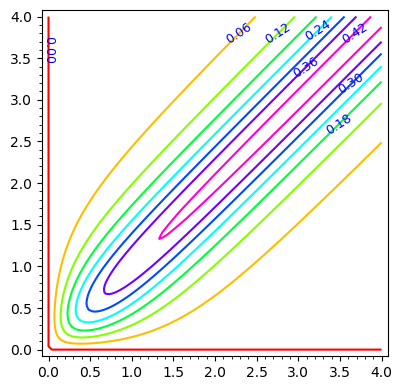

In [56]:
contour_plot(Kern_dipol(rm =0.5, ra=1, zm = z_m, za=z_a), (z_m,0,4), (z_a,0,4), fill=False, cmap='hsv', labels=True)

In [36]:
eq1 = - A_q(r_a, z_a).diff(z_a) == \
    + definite_integral( \
        definite_integral( \
            (j_m(r_m=r_m, z_m=z_m) * Kern_dipol(r_m, r_a, z_m, z_a)).diff(z_a), \
                r_m, 0, Infinity, hold=True), \
                    z_m, 0, Infinity, hold=True)

Разделим интеграл в правой части на сумму двух интегралов по переменной интегрирования $r_m$. 

In [57]:
eq1 = - A_q(r_a, z_a).diff(z_a) == \
    + definite_integral( \
        definite_integral( \
            (j_m(r_m=r_m, z_m=z_m) * Kern_dipol(r_m, r_a, z_m, z_a)).diff(z_a), \
                z_m, 0, Infinity, hold=True), \
                   r_m, 0, r_a, hold=True) \
    + definite_integral( \
        definite_integral( \
            (j_m(r_m=r_m, z_m=z_m) * Kern_dipol(r_m, r_a, z_m, z_a)).diff(z_a), \
                z_m, 0, Infinity, hold=True), \
                    r_m, r_a, Infinity, hold=True)

Продифференцируем теперь обе части интегрального уравнения по $r_a$

In [36]:
eq1 = - A_q(r_a, z_a).diff(z_a).diff(r_a) == \
    + definite_integral( \
        definite_integral( \
            (j_m(r_m=r_m, z_m=z_m) * Kern_dipol(r_m, r_a, z_m, z_a)).diff(z_a).diff(r_a), \
                z_m, 0, Infinity, hold=True), \
                   r_m, 0, r_a, hold=True) \
    + definite_integral( #            assume(r_m < r_a)\
        (j_m(r_m=r_m, z_m=z_m) * Kern_dipol(r_m, r_a, z_m, z_a)).diff(z_a).subs(r_m == r_a), \
            z_m, 0, Infinity, hold=True)
    + definite_integral( \
        definite_integral( \
            (j_m(r_m=r_m, z_m=z_m) * Kern_dipol(r_m, r_a, z_m, z_a)).diff(z_a).diff(r_a), \
                z_m, 0, Infinity, hold=True), \
                    r_m, r_a, Infinity, hold=True)
    - definite_integral( #            assume(r_m > r_a)\
        (j_m(r_m=r_m, z_m=z_m) * Kern_dipol(r_m, r_a, z_m, z_a)).diff(z_a).subs(r_m == r_a), \
            z_m, 0, Infinity, hold=True)

In [36]:
eq1 = - A_q(r_a, z_a).diff(z_a).diff(r_a) == \
    + definite_integral( \
        definite_integral( \
            (j_m(r_m=r_m, z_m=z_m) * Kern_dipol(r_m, r_a, z_m, z_a)).diff(z_a).diff(r_a), \
                z_m, 0, Infinity, hold=True), \
                   r_m, 0, Infinity, hold=True) \
    + definite_integral( #            assume(r_m < r_a)\
        (j_m(r_m=r_m, z_m=z_m) * Kern_dipol(r_m, r_a, z_m, z_a)).diff(z_a).subs(r_m == r_a), \
            z_m, 0, Infinity, hold=True)
    - definite_integral( #            assume(r_m > r_a)\
        (j_m(r_m=r_m, z_m=z_m) * Kern_dipol(r_m, r_a, z_m, z_a)).diff(z_a).subs(r_m == r_a), \
            z_m, 0, Infinity, hold=True)

ядро не является симметричным относительно переменных $r_m$, $r_a$, то разность

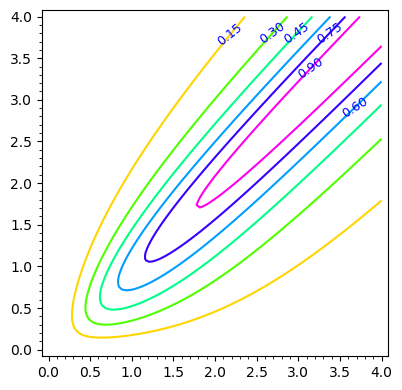

In [55]:
contour_plot(Kern_dipol(rm = r_m, ra = r_a, zm = 0.5, za = 1), (r_m,0,4), (r_a,0,4), fill=False, cmap='hsv', labels=True)

In [70]:
displ("-\\left("+latex(A_q(ra=r_a, za=z_a).diff(z_a))+"\\right) = " +
      " \\int\\limits_{z_m=0}^{z_a}\\,\\int\\limits_{r_m=0}^{\\infty}\\frac{q_m(r_m, z_m)\\," +
      " \\omega_m (r_m, z_m) \\, r_m}{c}" +
      " \\cdot \\left(" + 
      latex(Kern_dipol(r_m, r_a, z_m, z_a)) +
      "\\right)  \\, d r_m \\, d z_m "+
      " +\\int\\limits_{z_m=z_a}^{\\infty}\\,\\int\\limits_{r_m=0}^{\\infty}\\frac{q_m(r_m, z_m)\\," +
      " \\omega_m (r_m, z_m) \\, r_m}{c}" +
      " \\cdot \\left(" + 
      latex(Kern_dipol(r_m, r_a, z_m, z_a)) +
      "\\right)  \\, d r_m \\, d z_m"
     )

<IPython.core.display.Math object>

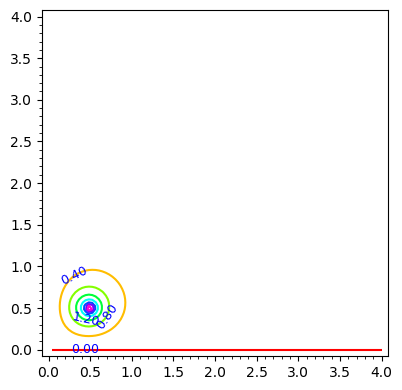

In [34]:
contour_plot(Kern_dipol(rm = 0.5, ra=r_a, zm = 0.5, za=z_a), (r_a,0,4), (z_a,0,4), fill=False, cmap='hsv', labels=True)

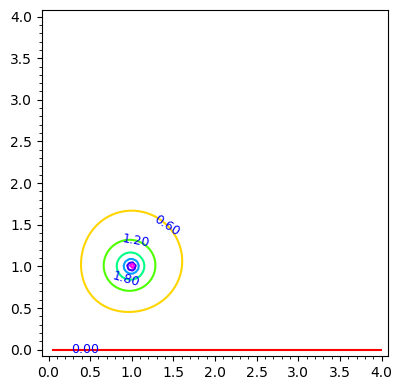

In [35]:
contour_plot(Kern_dipol(rm = 1, ra=r_a, zm = 1, za=z_a), (r_a,0,4), (z_a,0,4), fill=False, cmap='hsv', labels=True)

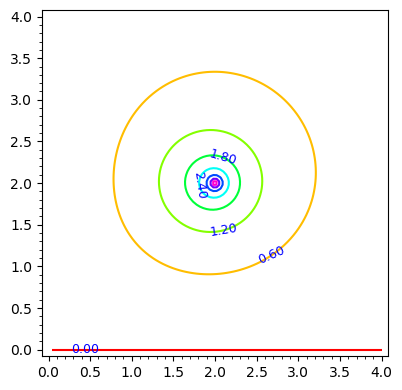

In [36]:
contour_plot(Kern_dipol(rm = 2, ra=r_a, zm = 2, za=z_a), (r_a,0,4), (z_a,0,4), fill=False, cmap='hsv', labels=True)

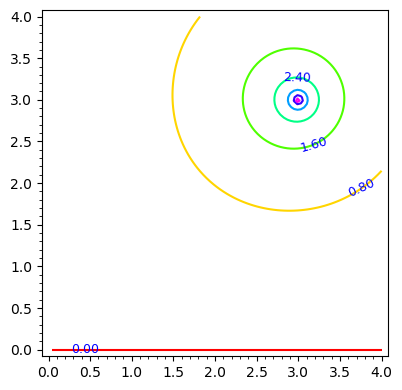

In [37]:
contour_plot(Kern_dipol(rm = 3, ra=r_a, zm = 3, za=z_a), (r_a,0,4), (z_a,0,4), fill=False, cmap='hsv', labels=True)

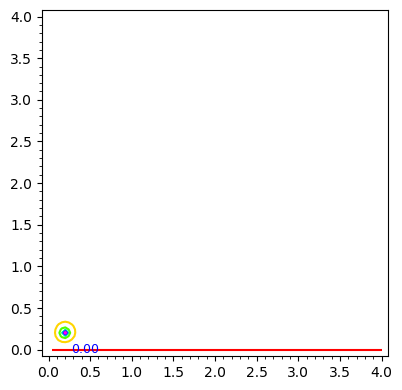

In [38]:
contour_plot(Kern_dipol(rm = 0.2, ra=r_a, zm = 0.2, za=z_a), (r_a,0,4), (z_a,0,4), fill=False, cmap='hsv', labels=True)

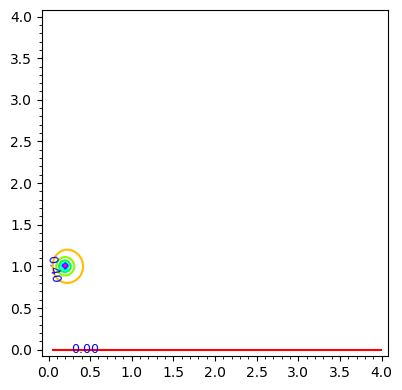

In [39]:
contour_plot(Kern_dipol(rm = 0.2, ra=r_a, zm = 1, za=z_a), (r_a,0,4), (z_a,0,4), fill=False, cmap='hsv', labels=True)

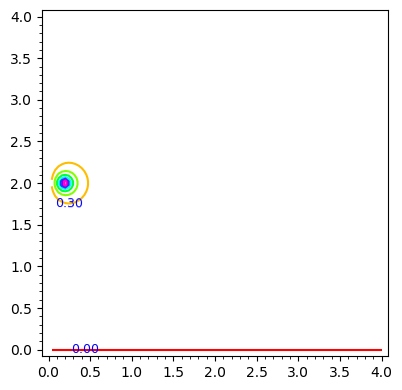

In [40]:
contour_plot(Kern_dipol(rm = 0.2, ra=r_a, zm = 2, za=z_a), (r_a,0,4), (z_a,0,4), fill=False, cmap='hsv', labels=True)

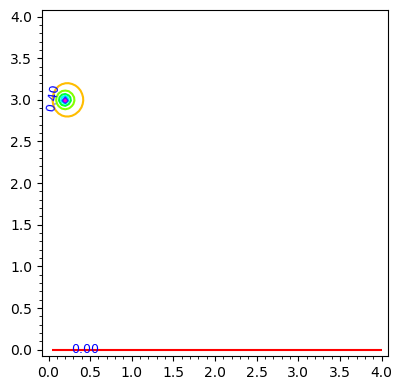

In [41]:
contour_plot(Kern_dipol(rm = 0.2, ra=r_a, zm = 3, za=z_a), (r_a,0,4), (z_a,0,4), fill=False, cmap='hsv', labels=True)

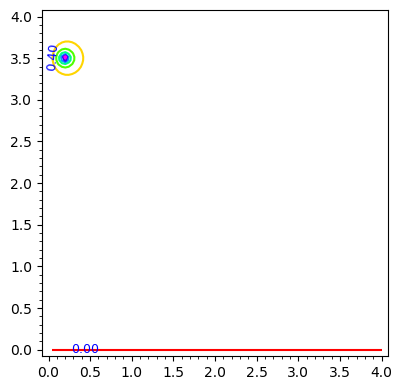

In [42]:
contour_plot(Kern_dipol(rm = 0.2, ra=r_a, zm = 3.5, za=z_a), (r_a,0,4), (z_a,0,4), fill=False, cmap='hsv', labels=True)

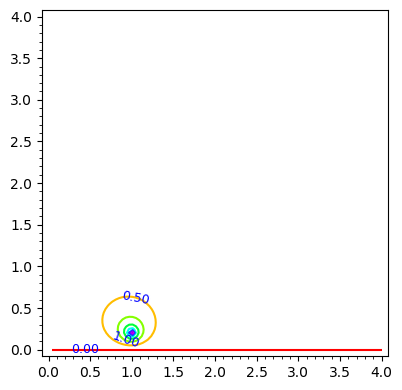

In [43]:
contour_plot(Kern_dipol(rm = 1, ra=r_a, zm = 0.2, za=z_a), (r_a,0,4), (z_a,0,4), fill=False, cmap='hsv', labels=True)

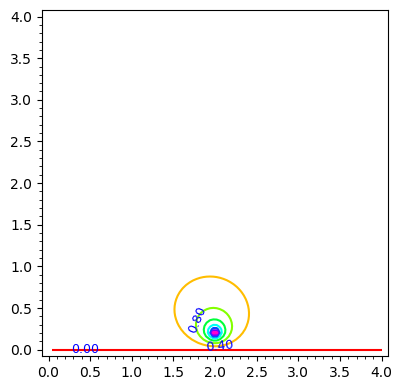

In [44]:
contour_plot(Kern_dipol(rm = 2, ra=r_a, zm = 0.2, za=z_a), (r_a,0,4), (z_a,0,4), fill=False, cmap='hsv', labels=True)

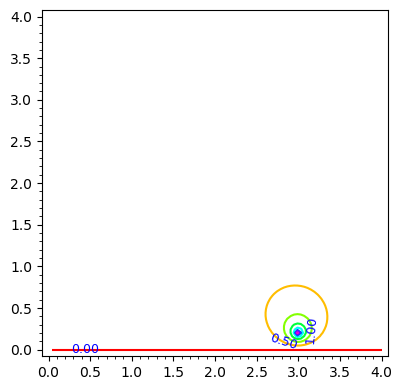

In [45]:
contour_plot(Kern_dipol(rm = 3, ra=r_a, zm = 0.2, za=z_a), (r_a,0,4), (z_a,0,4), fill=False, cmap='hsv', labels=True)

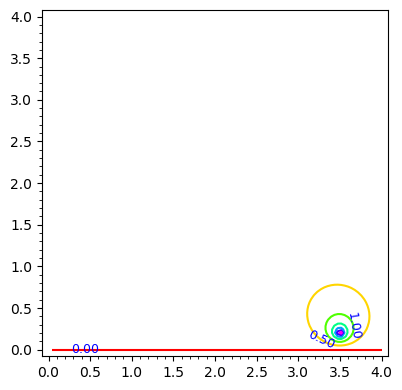

In [46]:
contour_plot(Kern_dipol(rm = 3.5, ra=r_a, zm = 0.2, za=z_a), (r_a,0,4), (z_a,0,4), fill=False, cmap='hsv', labels=True)

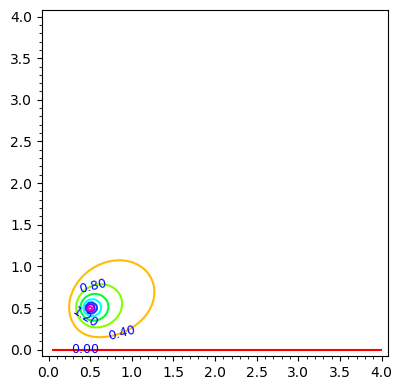

In [47]:
contour_plot(Kern_dipol(rm = r_m, ra=0.5, zm = z_m, za=0.5), (r_m,0,4), (z_m,0,4), fill=False, cmap='hsv', labels=True)

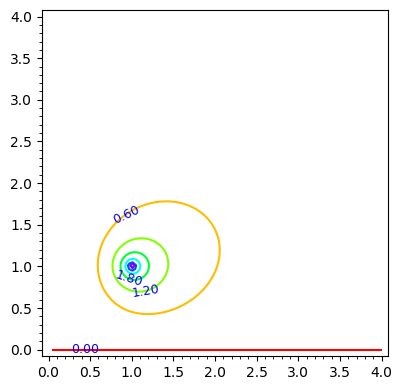

In [48]:
contour_plot(Kern_dipol(rm = r_m, ra=1.0, zm = z_m, za=1.0), (r_m,0,4), (z_m,0,4), fill=False, cmap='hsv', labels=True)

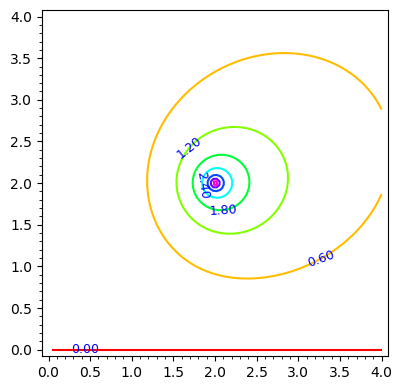

In [49]:
contour_plot(Kern_dipol(rm = r_m, ra=2.0, zm = z_m, za=2.0), (r_m,0,4), (z_m,0,4), fill=False, cmap='hsv', labels=True)

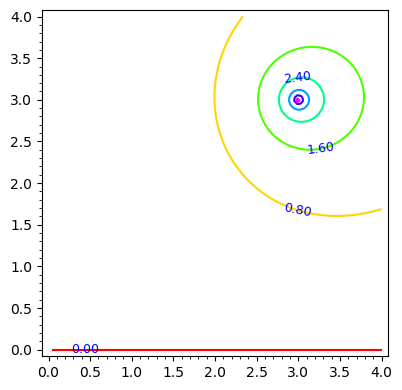

In [50]:
contour_plot(Kern_dipol(rm = r_m, ra=3.0, zm = z_m, za=3.0), (r_m,0,4), (z_m,0,4), fill=False, cmap='hsv', labels=True)

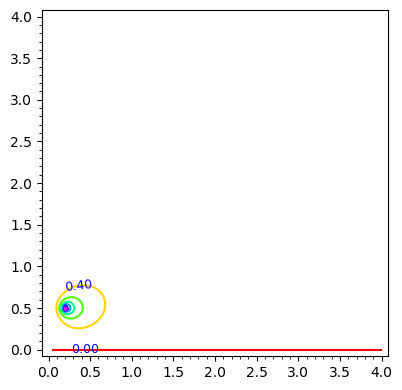

In [51]:
contour_plot(Kern_dipol(rm = r_m, ra=0.2, zm = z_m, za=0.5), (r_m,0,4), (z_m,0,4), fill=False, cmap='hsv', labels=True)

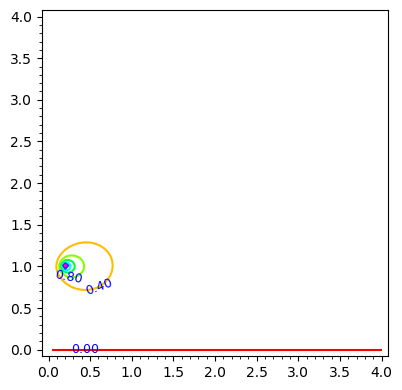

In [52]:
contour_plot(Kern_dipol(rm = r_m, ra=0.2, zm = z_m, za=1.0), (r_m,0,4), (z_m,0,4), fill=False, cmap='hsv', labels=True)

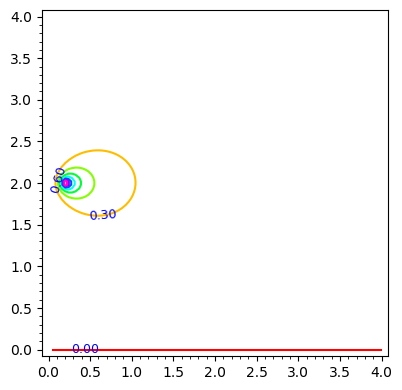

In [53]:
contour_plot(Kern_dipol(rm = r_m, ra=0.2, zm = z_m, za=2.0), (r_m,0,4), (z_m,0,4), fill=False, cmap='hsv', labels=True)

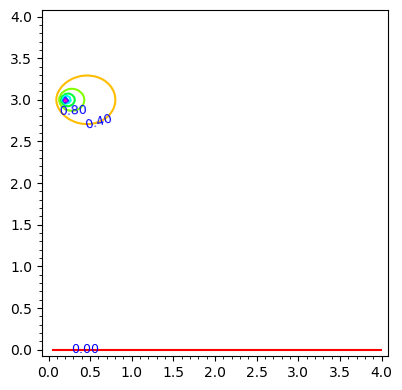

In [54]:
contour_plot(Kern_dipol(rm = r_m, ra=0.2, zm = z_m, za=3.0), (r_m,0,4), (z_m,0,4), fill=False, cmap='hsv', labels=True)

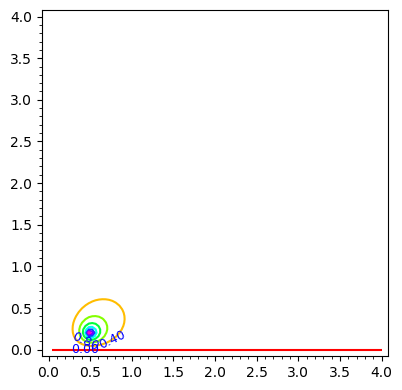

In [55]:
contour_plot(Kern_dipol(rm = r_m, ra=0.5, zm = z_m, za=0.2), (r_m,0,4), (z_m,0,4), fill=False, cmap='hsv', labels=True)

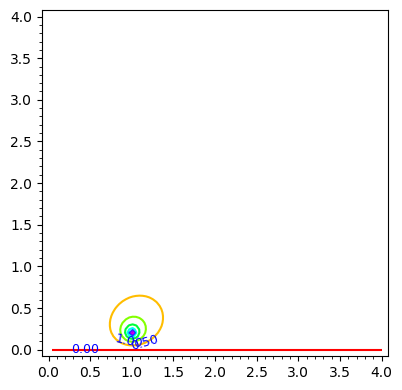

In [56]:
contour_plot(Kern_dipol(rm = r_m, ra=1.0, zm = z_m, za=0.2), (r_m,0,4), (z_m,0,4), fill=False, cmap='hsv', labels=True)

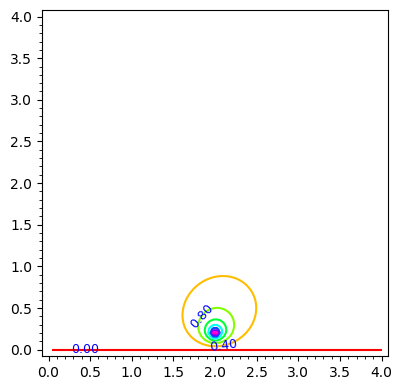

In [57]:
contour_plot(Kern_dipol(rm = r_m, ra=2.0, zm = z_m, za=0.2), (r_m,0,4), (z_m,0,4), fill=False, cmap='hsv', labels=True)

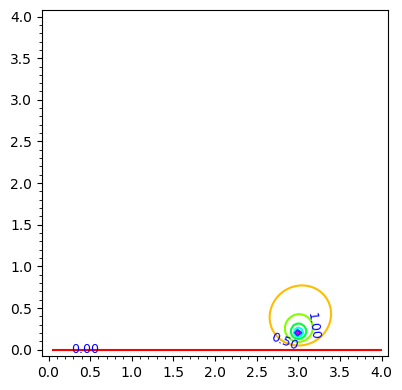

In [58]:
contour_plot(Kern_dipol(rm = r_m, ra=3.0, zm = z_m, za=0.2), (r_m,0,4), (z_m,0,4), fill=False, cmap='hsv', labels=True)

Несмотря на то, что решение интегрального уравнения для векторного потенциала кулоновского заряда пока что не получено, но анализ контурных графиков показывает, что при увеличении координат интегрирования $r_m$, $z_m$, т.е. координат магнитных зарядов общая "энергия" (интеграл по обьему координат наблюдения) для ядра этого интегрального уравнения растёт. Следовательно, поскольку в левой части интегрального уравнения константа, то есть при интегрировании произведения неизвестной функции (распределение плотности магнитных зарядов и их скорости) на ядро интегрального уравнения по координатам магнитных зарядов мы должны получить константу во всем обьёме координат наблюдения, постольку искомая неизвестная функция распределенния магнитных токов является убывающей по мере отдаления от центра частицы